In [2]:
import pandas as pd
from skimage.io import imread,imsave,imshow
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from pathlib import Path

In [3]:
!ls data

class_map.csv	       test.csv			  train.csv
imgs		       test_image_data_0.parquet  train_image_data_0.parquet
Kalpurush.ttf	       test_image_data_1.parquet  train_image_data_1.parquet
Kalpurush.zip	       test_image_data_2.parquet  train_image_data_2.parquet
sample_submission.csv  test_image_data_3.parquet  train_image_data_3.parquet


In [4]:
img_data_dir = Path("data/imgs")

In [5]:
df1 = pd.read_parquet("data/train_image_data_0.parquet")

/home/ravi/miniconda3/envs/fastpy3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/ravi/miniconda3/envs/fastpy3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/ravi/miniconda3/envs/fastpy3/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [6]:
df1.head(2)

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254


In [15]:
len(df1)

50210

In [8]:
height = 137
width = 236

In [9]:
df1.set_index("image_id",inplace=True)

In [10]:
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
image_id,,,,,,,,,,,,,,,,,,,,,
Train_0,254,253,252,253,251,252,253,251,251,253,...,253,253,253,253,253,253,253,253,253,251
Train_1,251,244,238,245,248,246,246,247,251,252,...,255,255,255,255,255,255,255,255,255,254


In [11]:
a = df1.iterrows()

In [12]:
next(a)[0]

'Train_0'

In [13]:
b = next(a)[1].values

In [39]:
b1 = b.reshape((height,width))

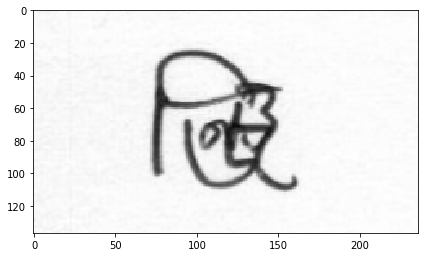

In [40]:
imshow(b1)

In [41]:
b1

array([[238, 236, 234, ..., 221, 221, 216],
       [245, 247, 246, ..., 246, 246, 246],
       [248, 250, 248, ..., 250, 249, 250],
       ...,
       [249, 247, 251, ..., 252, 253, 254],
       [249, 246, 250, ..., 251, 253, 254],
       [246, 243, 247, ..., 251, 252, 253]], dtype=uint8)

In [42]:
np.min(b1),np.max(b1)

(10, 255)

In [43]:
b1 = 255-b1

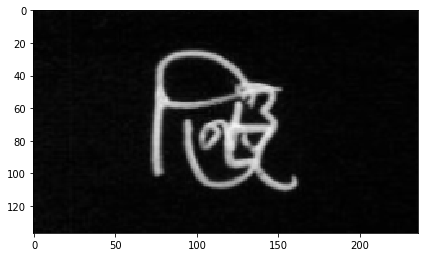

In [44]:
imshow(b1)

In [45]:
np.min(b1),np.max(b1)

(0, 245)

In [56]:
b2 = np.where(b1>50,b1,0)

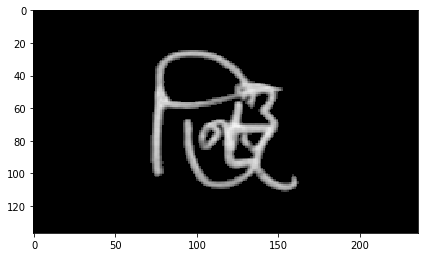

In [57]:
imshow(b2)

In [14]:
pth = img_data_dir/"train_0"
for fl_nm_stem,arr in df1.iterrows():
    fl_nm = pth/(fl_nm_stem+".png")
    arr = arr.values.reshape((height,width))
    arr = 255-arr
    arr = np.where(arr>50,arr,0)
    imsave(fl_nm,arr)

In [18]:
df2 = pd.read_parquet("data/train_image_data_1.parquet")
df2.set_index("image_id",inplace=True)
pth = img_data_dir/"train_1"
for fl_nm_stem,arr in df2.iterrows():
    fl_nm = pth/(fl_nm_stem+".png")
    arr = arr.values.reshape((height,width))
    arr = 255-arr
    arr = np.where(arr>50,arr,0)
    imsave(fl_nm,arr)

In [19]:
df2 = pd.read_parquet("data/train_image_data_2.parquet")
df2.set_index("image_id",inplace=True)
pth = img_data_dir/"train_2"
for fl_nm_stem,arr in df2.iterrows():
    fl_nm = pth/(fl_nm_stem+".png")
    arr = arr.values.reshape((height,width))
    arr = 255-arr
    arr = np.where(arr>50,arr,0)
    imsave(fl_nm,arr)

/home/ravi/miniconda3/envs/fastpy3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: data/imgs/train_2/Train_114960.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [20]:
df2 = pd.read_parquet("data/train_image_data_3.parquet")
df2.set_index("image_id",inplace=True)
pth = img_data_dir/"train_3"
for fl_nm_stem,arr in df2.iterrows():
    fl_nm = pth/(fl_nm_stem+".png")
    arr = arr.values.reshape((height,width))
    arr = 255-arr
    arr = np.where(arr>50,arr,0)
    imsave(fl_nm,arr)